In [4]:
# Install the normal libraries

# Import pandas so we can import the data into Python, view it, and
# drop the empty cells
import pandas as pd
# Import matplotlib to create graphs
import matplotlib.pyplot as plt
# Import Scipy to find the correlation coefficients and the linear
# regression model
import scipy.stats

In [5]:
# GOOGLE DRIVE SET UP
from google.colab import drive
# Mount my Google Drive
drive.mount('/content/gdrive')

## This is the file path for my Google Drive account
## CHANGE THIS STRING TO REFLECT WHERE THE FILE IS STORED
file_path = "/content/gdrive/My Drive/Colab Notebooks/"

## Import the data as a dataframe
titanic_data = pd.read_csv(file_path + 'titanic_train.csv')

Mounted at /content/gdrive


In [6]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen Carrie",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# Prints a statistical summary of data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

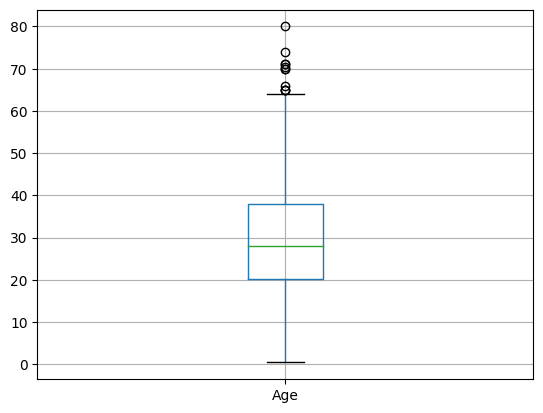

In [8]:
# most people were between the ages of 20- 37 with a decent ammount of outliersd in the 65-70 range.
titanic_data.boxplot("Age")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Text(0.5, 1.0, ' Total age of people in each Pclass')

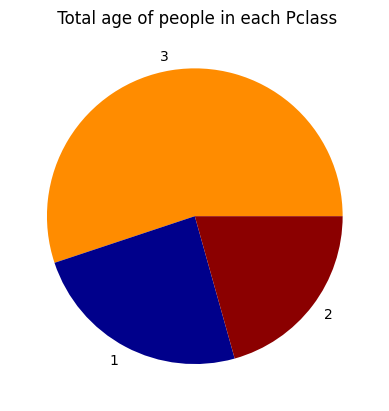

In [9]:
# shows the total age of each class on the ship
# Shows that the 3rd class had the most people on board
Age= titanic_data["Pclass"].value_counts()
print(Age)
pie_colors = ["darkorange", "darkblue", "darkred", "darkgreen", "darkmagenta", "black",\
              "darkslategrey"]
plt.pie(Age, labels=Age.index, colors=pie_colors)
plt.title(" Total age of people in each Pclass")

In [10]:
## Chi Squared Test
contingency_table = pd.crosstab(titanic_data["Fare"], titanic_data["Pclass"])

# the p-value of 4.5 means the diviation is not significant
c, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)

print("Chi-squared statistic:", c)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:", expected)

Chi-squared statistic: 1697.8343156429028
P-value: 1.0986166679130083e-131
Degrees of freedom: 494
Expected frequencies table: [[ 3.63636364  3.0976431   8.26599327]
 [ 0.24242424  0.20650954  0.55106622]
 [ 0.24242424  0.20650954  0.55106622]
 [ 0.24242424  0.20650954  0.55106622]
 [ 0.24242424  0.20650954  0.55106622]
 [ 0.24242424  0.20650954  0.55106622]
 [ 0.48484848  0.41301908  1.10213244]
 [ 0.48484848  0.41301908  1.10213244]
 [ 0.24242424  0.20650954  0.55106622]
 [ 0.24242424  0.20650954  0.55106622]
 [ 0.48484848  0.41301908  1.10213244]
 [ 0.24242424  0.20650954  0.55106622]
 [ 1.6969697   1.44556678  3.85746352]
 [ 0.48484848  0.41301908  1.10213244]
 [ 0.96969697  0.82603816  2.20426487]
 [ 0.24242424  0.20650954  0.55106622]
 [ 2.90909091  2.47811448  6.61279461]
 [ 3.63636364  3.0976431   8.26599327]
 [ 3.15151515  2.68462402  7.16386083]
 [ 0.24242424  0.20650954  0.55106622]
 [ 0.72727273  0.61952862  1.65319865]
 [ 0.24242424  0.20650954  0.55106622]
 [ 0.96969697  

In [11]:
print(contingency_table)

Pclass    1  2  3
Fare             
0.0000    5  6  4
4.0125    0  0  1
5.0000    1  0  0
6.2375    0  0  1
6.4375    0  0  1
...      .. .. ..
227.5250  4  0  0
247.5208  2  0  0
262.3750  2  0  0
263.0000  4  0  0
512.3292  3  0  0

[248 rows x 3 columns]


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

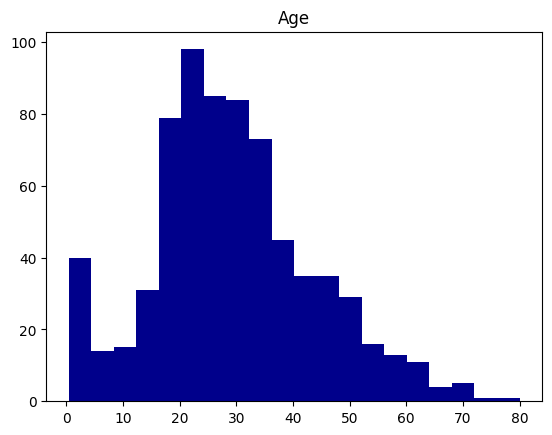

In [12]:
titanic_data.hist("Age", bins=20, grid=False, color="darkblue")


([<matplotlib.axis.YTick at 0x78717c13c7c0>,
 [Text(0, 0, 'Fare'), Text(0, 1, 'PassengerId')])

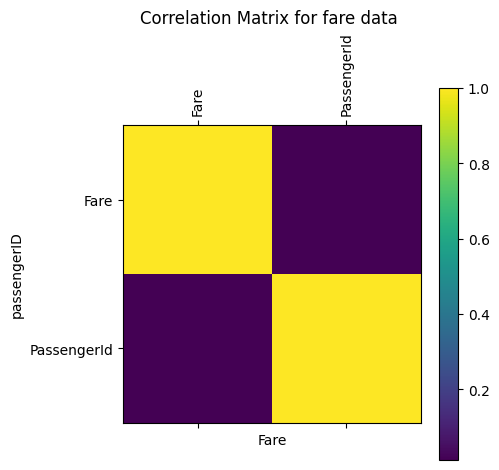

In [13]:
# Assuming titanic_data is your DataFrame
# Calculate the correlation matrix
corr_scores = titanic_data[["Fare", "PassengerId"]].corr()  # Replace "Fare", "PassengerId" with desired columns

plt.matshow(corr_scores)
plt.xlabel("Fare")
plt.ylabel("passengerID")
plt.title("Correlation Matrix for fare data ")
plt.colorbar()
num_labels = len(corr_scores.index)
plt.xticks(ticks=range(num_labels), labels=corr_scores.index, rotation=90)
plt.yticks(ticks=range(num_labels), labels=corr_scores.index, rotation=0)

In [14]:
import statsmodels.api as sm # Import the statsmodels library with the alias 'sm'

y = titanic_data.Pclass
X = titanic_data.Fare

X = sm.add_constant(X)  # Now sm is defined and can be used

linear_model = sm.OLS(y, X).fit()

print(linear_model.summary())
print(linear_model.params)

                            OLS Regression Results                            
Dep. Variable:                 Pclass   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     384.5
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.97e-71
Time:                        14:29:19   Log-Likelihood:                -944.11
No. Observations:                 891   AIC:                             1892.
Df Residuals:                     889   BIC:                             1902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6064      0.028     93.397      0.0

In [15]:
## Pearson's correlation coefficient
# Access the 'Age' and 'PassengerId' columns from the titanic_data DataFrame
# Remove rows with missing values (NaN) in either 'Age' or 'PassengerId'
titanic_data_clean = titanic_data.dropna(subset=["Age", "PassengerId"])

# Calculate the correlation on the cleaned data
corr = scipy.stats.pearsonr(titanic_data_clean["Age"], titanic_data_clean["PassengerId"])

print("Correlation Score:", corr[0])

Correlation Score: 0.036847197861327806


In [16]:
## Creating a linear regression model
# Access the 'Age' and 'PassengerId' columns from the titanic_data DataFrame
x = titanic_data["Age"]
y = titanic_data["PassengerId"]

# Remove rows with missing values (NaN) in either 'Age' or 'PassengerId'
clean_data = titanic_data.dropna(subset=["Age", "PassengerId"])

# Extract the cleaned 'Age' and 'PassengerId' columns
x_clean = clean_data["Age"]
y_clean = clean_data["PassengerId"]

# Calculate linear regression on the cleaned data
linear_model = scipy.stats.linregress(x_clean, y_clean)
print(linear_model)

LinregressResult(slope=0.6572698268725974, intercept=429.06229913907003, rvalue=0.03684719786132785, pvalue=0.3255116714079147, stderr=0.6680426772473379, intercept_stderr=22.083445553402377)


In [17]:
# Extracts the slope and y-intercept from the linear model
slope = linear_model.slope
intercept = linear_model.intercept

# Creates a linear fit to the data
linear_fit = slope*Age+intercept

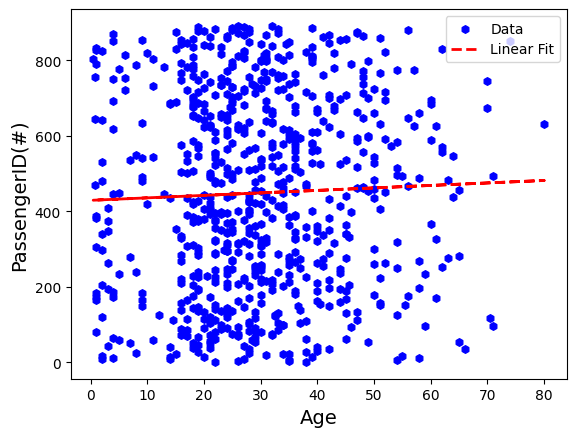

In [18]:
import matplotlib.pyplot as plt
import scipy.stats

# Assuming 'linear_model', 'x_clean', 'y_clean' are defined from previous cells

# Extracts the slope and y-intercept from the linear model
slope = linear_model.slope
intercept = linear_model.intercept

# Creates a linear fit to the data using x_clean
linear_fit = slope * x_clean + intercept # Use x_clean here, not Age

plt.scatter(x_clean, y_clean, s=30, color="blue", marker="h", label="Data") # Use x_clean and y_clean
plt.plot(x_clean, linear_fit, linewidth=2, color="red", linestyle="--", label="Linear Fit") # Use x_clean here
plt.xlabel("Age", fontsize=14)
plt.ylabel("PassengerID(#)", fontsize=14)
plt.legend()
plt.show() # To display the plot
## Creating a linear regression model
# Access the 'Age' and 'PassengerId' columns from the titanic_data DataFrame
x = titanic_data["Age"]
y = titanic_data["PassengerId"]

# Remove rows with missing values (NaN) in either 'Age' or 'PassengerId'
clean_data = titanic_data.dropna(subset=["Age", "PassengerId"])



In [2]:
from scipy.stats import ks_2samp

# Create two sample arrays
Survived = [1, 2, 3, 4, 5]
Embarked = [2, 3, 4, 5, 6]

# Assuming 'data1' and 'data2' are meant to be 'Survived' and 'Embarked'
# Perform the KS test
statistic, p_value = ks_2samp(Survived, Embarked) # Changed data1 and data2

# Print the results
print("KS statistic:", statistic)
print("p-value:", p_value)

KS statistic: 0.2
p-value: 1.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


In [3]:
from scipy.stats import ks_2samp

# Create two sample arrays
Pclass = [1, 2, 3, 4, 5]
PassengerID = [2, 3, 4, 5, 6]

# Assuming 'data1' and 'data2' are meant to be 'Pclass' and 'PassengerID'
# Perform the KS test
statistic, p_value = ks_2samp(Pclass, PassengerID) # Changed data1 and data2

# Print the results
print("KS statistic:", statistic)
print("p-value:", p_value)

KS statistic: 0.2
p-value: 1.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
